In [5]:
## Set up the libraries

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import  Adam, SGD
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from tensorflow import keras

print("Set up Completed !")

Set up Completed !


## Etape 2 : XOR | Problem 2 :


Generating Data Samples

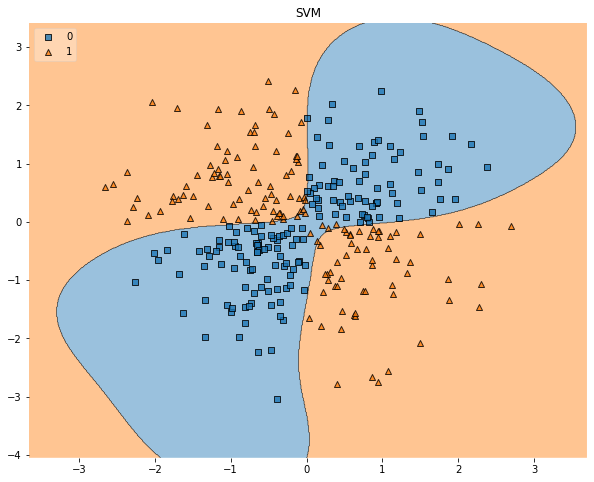

In [2]:
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
dtype=int)
svm_model = SVC(gamma='auto')
svm_model.fit(X, y)
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=svm_model, legend=2)
plt.title("SVM")
plt.show()

Data Split to train and test set

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



Neural Network construction

In [6]:
model1 = keras.Sequential([
    keras.layers.Input(shape=(2,)),  # Input layer
    keras.layers.Dense(4, activation='relu', kernel_initializer='he_normal'),  # Hidden layer with 4 neurons and relu as activation function with he initialization
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification with a sigmoid activation function
])

In [7]:
custom_learning_rate = 0.1 ## Learning Rate
custom_optimizer = keras.optimizers.Adam(learning_rate=custom_learning_rate) ##setting Adam as an Optimizer
model1.compile(custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)) 



Epoch 1/100
8/8 [==============================] - 2s 72ms/step - loss: 0.6852 - accuracy: 0.5542 - val_loss: 0.6299 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.5629 - accuracy: 0.6500 - val_loss: 0.4611 - val_accuracy: 0.8667
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3949 - accuracy: 0.9000 - val_loss: 0.2449 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.2495 - accuracy: 0.9625 - val_loss: 0.1526 - val_accuracy: 0.9833
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.1736 - accuracy: 0.9750 - val_loss: 0.1159 - val_accuracy: 0.9833
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1321 - accuracy: 0.9708 - val_loss: 0.0807 - val_accuracy: 0.9667
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 0.1147 - accuracy: 0.9667 - val_loss: 0.0659 - val_accuracy: 0.9833
Epoch 8/100
8/8 [===

In [8]:
accuracy = model1.evaluate(X_test, y_test)[1]
print(f"Accuracy: {accuracy}")

2/2 [==============================] - 0s 0s/step - loss: 0.0116 - accuracy: 1.0000
Accuracy: 1.0


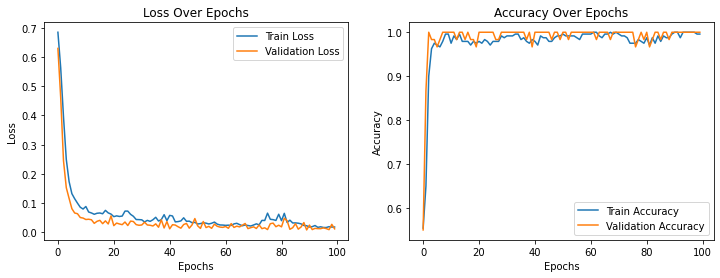

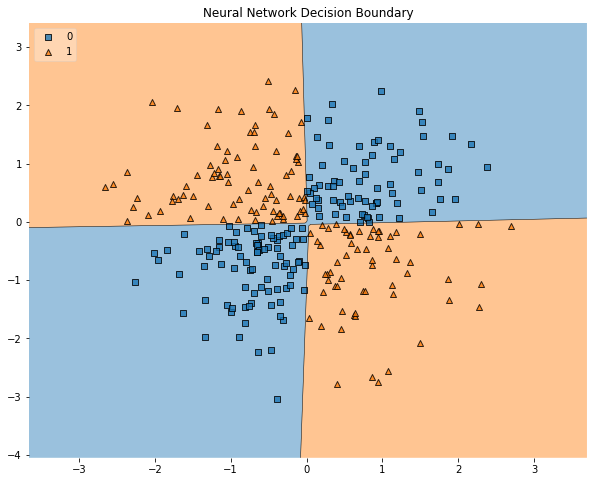

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

# Plot decision boundary
fig = plt.figure(figsize=(10, 8))
fig = plot_decision_regions(X=X, y=y, clf=model1, legend=2)
plt.title("Neural Network Decision Boundary")
plt.show()